# Community detection 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import networkx as nx

In [4]:
import networkx.algorithms.centrality as nc

In [5]:
from operator import itemgetter

In [10]:
import geopy.distance as distance

# Hierarchical clustering

We compute the hierarchical clustering of airport nodes based on their spatial distance

In [7]:
meta_path = "./../datasets/USairport_2010_codes.txt"

In [9]:
nodes={}

labels=[]

finfo = open(meta_path, "r")
for line in finfo.readlines():
    s = line.strip().split()
    node = int(s[0])

    lon = float(s[4])
    lat = float(s[3])

    nodes[node]=[lon, lat]
    labels.append(s[1])

finfo.close()

In [19]:
l=[]
a=list(nodes.keys())
for i in range(0, len(nodes.keys())):
    for j in range(0, len(nodes.keys())):
        if i<j:
            node1=a[i]
            node2=a[j]
            lat1=nodes[node1][1]
            long1=nodes[node1][0]
            lat2=nodes[node2][1]
            long2=nodes[node2][0]
            d=distance.geodesic( (lat1, long1), (lat2, long2)).km 
            l.append(d)
print( len(l) )

85905


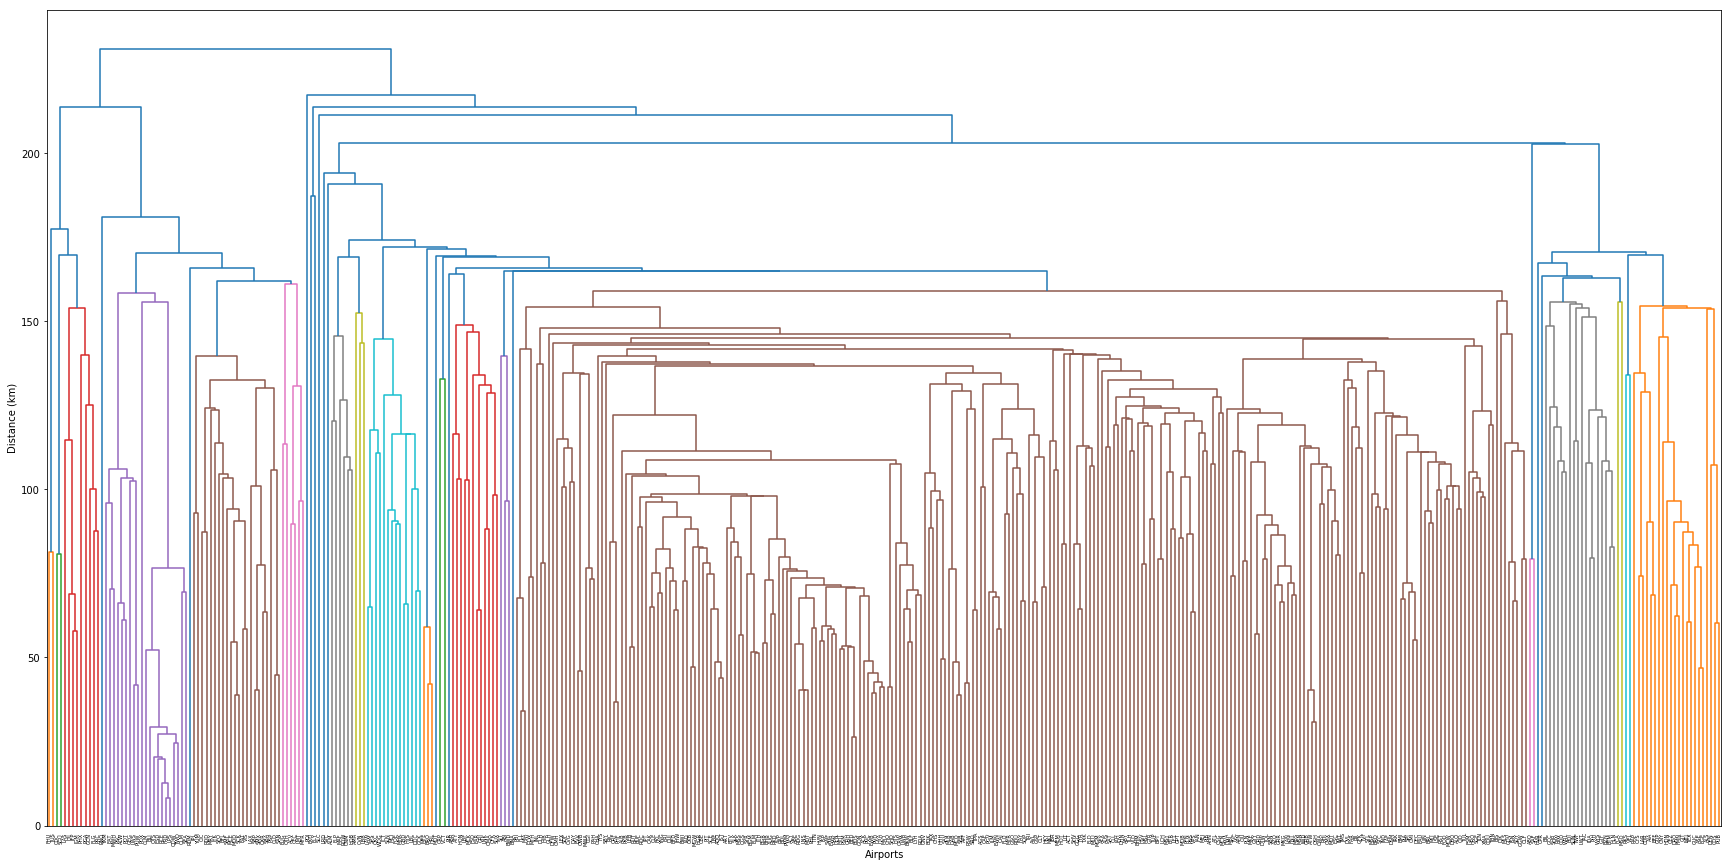

In [23]:
plt.figure(figsize=(30,15))

data_link = linkage(l, method='single') # computing the linkage, this uses the min value

dendrogram(data_link, labels=labels)

plt.xlabel('Airports')
plt.ylabel('Distance (km)')
plt.savefig('./airport_dendrogram.png', bbox_inches='tight', dpi=300)

## The Karate Club 
This dataset, Zachary's Karate Club ([Zachary, 1977](https://www.jstor.org/stable/3629752)), is historically so important in network science, that NetworkX has even a function to import it! 

In [24]:
G = nx.karate_club_graph()

In [25]:
eNum = G.number_of_edges()
nnodes = len(G)

In [26]:
eNum, nnodes

(78, 34)

In [27]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

Note that the nodes are labelled from 0 to 33 while the most common labeling (as shown in Girvan 2002) starts from 1.

/Users/Michele/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(-1.116811224229799,
 1.1115920012405156,
 -0.8631700636071328,
 1.070989447388076)

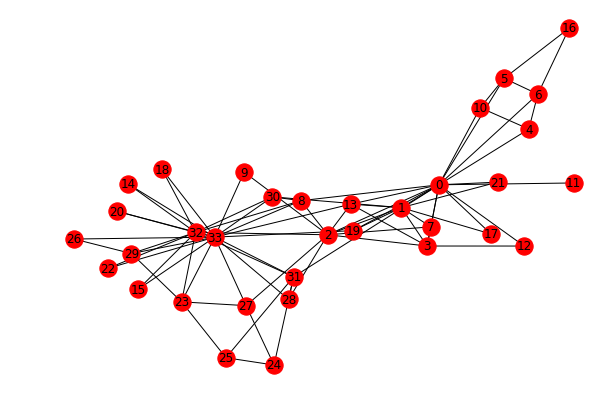

In [32]:
pos = nx.spring_layout(G)
plt.figure(figsize=(10,7))
nx.draw_networkx(G, pos)
plt.axis('off')

In [33]:
nx.number_connected_components(G)

1

In [34]:
nc.edge_betweenness(G)

{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

## Clustering functions 

We write two functions that implement the Girvan-Newman algorithm.

**First clustering function**

In [37]:
def updateGraph1(G):

    ebw = nc.edge_betweenness(G)
    
    maxs = 0
    for k, v in ebw.items():
        if maxs < v:
            medge, maxs = k, v

    G.remove_edge(medge[0], medge[1])

**Second clustering function**

In [38]:
def updateGraph2(G):

    ebw = nc.edge_betweenness(G)

    edge_list = sorted(ebw.items(), key=itemgetter(1))

    medge = edge_list[-1][0]

    G.remove_edge(medge[0], medge[1])

### Find the partition into two communities

In [39]:
while nx.is_connected(G):

    # we remove links until the graph is connected
    updateGraph1(G)

In [40]:
nx.is_connected(G)

False

In [41]:
nx.connected_components(G)

<generator object connected_components at 0x7ff265e92c78>

In [42]:
communities = [i for i in nx.connected_components(G)]
communities

[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

In [43]:
color_community = []

for i in range(0, len(G)):

    if i in communities[0]:
        color_community.append(0)
    else:
        color_community.append(1)

To compare the results to Figure 4 of the paper by Girvan and Newman nodes' labels must be increased by 1.

In [44]:
H = nx.karate_club_graph()

In [45]:
labels_GN = {}

for i in H:
    labels_GN[i] = i + 1

/Users/Michele/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


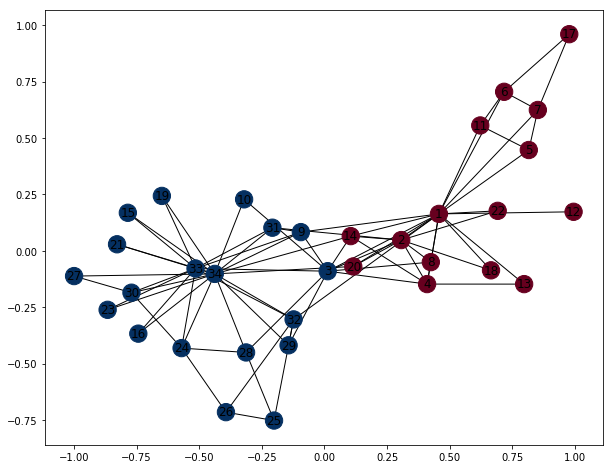

In [46]:
plt.figure(figsize=(10, 8))

nx.draw_networkx(
    H,
    pos,
    labels=labels_GN,
    node_color=color_community,
    cmap=plt.cm.RdBu,
    with_labels=True,
)